# Primeros pasos

**OpenCV** es una biblioteca libre de visión artificial originalmente desarrollada por Intel. Desde que apareció su primera versión alfa en el mes de enero de 1999, se ha utilizado en infinidad de aplicaciones. Desde sistemas de seguridad con detección de movimiento, hasta aplicaciones de control de procesos donde se requiere reconocimiento de objetos. Esto se debe a que su publicación se da bajo licencia BSD, que permite que sea usada libremente para propósitos comerciales y de investigación con las condiciones en ella expresadas.
Open CV es multiplataforma, existiendo versiones para GNU/Linux, Mac OS X y Windows. Contiene más de 500 funciones que abarcan una gran gama de áreas en el proceso de visión, como reconocimiento de objetos (reconocimiento facial), calibración de cámaras, visión estérea y visión robótica.


## Cargar imágenes

**Hello World** con openCV

In [4]:
# formacion01.py
import numpy as np
import cv2

imagePath = "dataset/examples/Holy-Grail.jpg"
img = cv2.imread(imagePath,0)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Dibujando en imágenes


In [6]:
# formacion02.py
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
# PARAMETERS
# img : The image where you want to draw the shapes
# color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
# thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. default thickness = 1
# lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA gives anti-aliased line which looks great for curves.
cv2.line(img,(0,0),(511,511),(255,0,0),5)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing Rectangle
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Operaciones sobre imágenes

In [ ]:
# formacion03.py
import cv2

img1 = cv2.imread("dataset/examples/Holy-Grail.jpg")
img2 = cv2.imread("dataset/examples/life-of-brian.jpg")

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

cv2.imshow('res', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Espacio de color

In [1]:
# formacion04.py
import cv2
import numpy as np

img = cv2.imread("dataset/examples/Holy-Grail.jpg")

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Umbralización

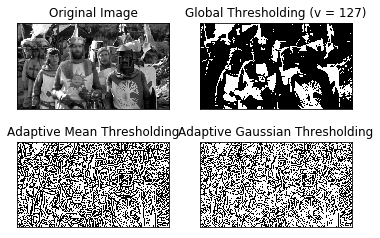

In [5]:
# formacion05.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataset/examples/Holy-Grail.jpg", 0)
img = cv2.medianBlur(img, 5)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                            cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## Reproducir un vídeo

In [5]:
# formacion06.py
import cv2

cap = cv2.VideoCapture("dataset/examples-video/test.mp4")

while (cap.isOpened()):
    ret, frame = cap.read()

    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Operaciones sobre video

In [7]:
# formacion07.py
from __future__ import absolute_import, division, print_function, unicode_literals

import cv2
import numpy as np

cap = cv2.VideoCapture("dataset/examples-video/test.mp4")

while (cap.isOpened()):
    ret, frame = cap.read()

    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    height = np.size(frame, 0)
    width = np.size(frame, 1)

    cv2.line(frame, (width, height // 10), (0, height // 10), (255, 0, 255), 5)
    cv2.line(frame, (width, (height // 10) * 9), (0, (height // 10) * 9), (255, 255, 0), 5)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Captura de vídeo

In [8]:
# formacion08.py
import cv2

cap = cv2.VideoCapture(0)

while (True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Operaciones sobre Captura de vídeo

In [9]:
# formacion09.py
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('libraries/data/haarcascades/haarcascade_frontalface_default.xml')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        img_rect = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

    # Display the resulting frame
    cv2.imshow('frame',img_rect if len(faces) > 1 else frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Operaciones sobre vídeo

In [10]:
# formacion10.py
import numpy as np
import cv2

cap = cv2.VideoCapture("dataset/examples-video/test.mp4")

# face_cascade = cv2.CascadeClassifier('libraries/data/haarcascades/cascadeH5.xml')
face_cascade = cv2.CascadeClassifier('libraries/data/haarcascades/HS.xml')
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    height = np.size(frame, 0)
    width = np.size(frame, 1)
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        img_rect = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

    # Display the resulting frame
    cv2.imshow('frame',img_rect if len(faces) > 1 else frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()